In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import time

from utils import JacobiGL, constructV, constructVx, constructD, z2x, z2x_dx, x2z, x2z_dz, JacobiP

sns.set_theme(style="whitegrid")

# Time-dependent problems
## c)

In [3]:
c = 0.1
x0 = 0
alpha = 20

def f(x, c=c, x0=x0):
    return 1/2 * c / np.cosh(1/2 * np.sqrt(c) * (x - x0))**2

def u_exact(x, t):
    return f(x - c*t)

def u_exact_z(z, t):
    x = alpha/np.pi * z - alpha
    return f(x - c*t)

In [18]:
def diff_mat(N):
    D = np.zeros((N, N))

    # The derivative function
    hj = lambda i, j : 1/2 * (-1)**(i - j) * np.cos(1/N * np.pi * (i - j)) \
                        / np.sin(1/N * np.pi * (i - j))

    # Insert in matrix
    for j in range(N):
        for i in range(N):
            if i != j:
                D[i, j] = hj(i, j)

    return D    





def MOL_KdV(N, t0 = 0, T = 10, t_eval = None):
    z = np.linspace(0, 2*np.pi, N)
    u0 = u_exact_z(z, t0)
    
    D = diff_mat(N)

    def rhs(t, u):
        return -6*np.pi / alpha * np.diag(u) @ D @ u - np.pi**3 / alpha**3 * D @ D @ D @ u 


    solver_KdV = scipy.integrate.solve_ivp(
        rhs,
        [t0, T],
        u0, 
        t_eval = t_eval
    ) 

    return z, solver_KdV.t, solver_KdV.y.T

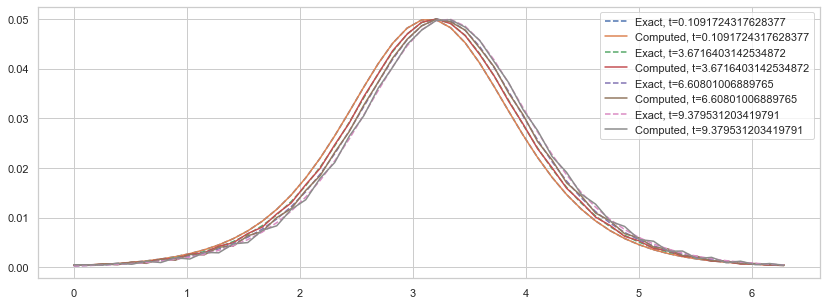

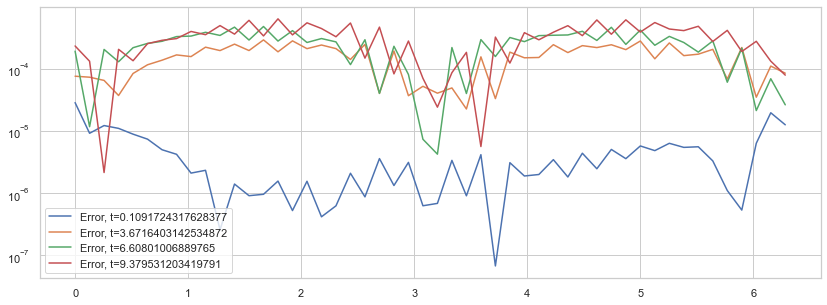

In [ ]:
# Short test
N = 50
t0 = 0
T = 10

z, t, u_computed = MOL_KdV(N, t0, T)

fig, ax = plt.subplots(1, 1, figsize=(14,5))

fig2, ax2 = plt.subplots(1, 1, figsize=(14,5))


for i in range(1, len(t), 100):

    uex = u_exact_z(z, t[i])

    ax.plot(z, uex, '--', label=f"Exact, t={t[i]}")
    ax.plot(z, u_computed[i], label=f"Computed, t={t[i]}")

    ax2.plot(z, abs(uex - u_computed[i]), label=f"Error, t={t[i]}")

ax.legend()

ax2.set_yscale('log')
ax2.legend()
plt.show()

